In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\MinhThw\OneDrive\Desktop\DATN\data\hyper.csv", sep=";")

In [3]:

data['Hypertension'] = data['Hypertension'].map({'Normal': 0, 'Prehypertension': 1, 'Stage 1 hypertension': 2,'Stage 2 hypertension':3})
data['Sex'] = data['Sex'].map({'Male': 1, 'Female': 0})
data['BMI'] = pd.to_numeric(data['BMI'].str.replace(',', '.'), errors='coerce')
data['Diabetes'] = data['Diabetes'].map(lambda x: 0 if pd.isna(x) else 1)
data['CI'] = data['Cerebral Infarction'].map(lambda x: 0 if pd.isna(x) else 1)
data['CD'] = data['Cerebrovascular Disease'].map(lambda x: 0 if pd.isna(x) else 1)
data['SBP'] = data['Systolic Blood Pressure']
data['DBP'] = data['Diastolic Blood Pressure']
data = data.drop(['Num', 'Subject_ID','Cerebral Infarction', 'Cerebrovascular Disease', 'Diastolic Blood Pressure', 'Systolic Blood Pressure'], axis =1)

In [4]:
data

Sex  Age  Height  Weight  Heart Rate        BMI  Diabetes  Hypertension  \
0      0   45     152      63          97  27.268006         0             3   
1      0   50     157      50          76  20.284799         0             3   
2      0   47     150      47          79  20.888889         0             0   
3      1   45     172      65          87  21.971336         0             1   
4      0   46     155      65          73  27.055151         0             1   
..   ...  ...     ...     ...         ...        ...       ...           ...   
214    1   24     180      70          77  21.604938         0             0   
215    0   25     156      47          79  19.312952         0             0   
216    1   25     176      55          72  17.755682         0             1   
217    1   25     173      63          67  21.049818         0             0   
218    1   24     175      58          65  18.938776         0             0   

     CI  CD  SBP  DBP  
0     0   0  161   89  
1     0   0  160   93  
2     0   0  101   71  
3     0   0  136   93  
4     0   0  123   73  
..   ..  ..  ...  ...  
214   0   0  111   70  
215   0   0   93   57  
216   0   0  120   69  
217   0   0  106   69  
218   0   0  108   68  

[219 rows x 12 columns]

In [5]:
X = data [['Sex', 
           'Age', 
           'Height', 
           'Weight', 
           'SBP', 
           'DBP', 
           'Heart Rate', 
           'BMI',
           'Diabetes', 
           'CI', 
           'CD' ]]

In [6]:
y = data['Hypertension']

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

# Lấy độ quan trọng của đặc trưng
importance = model.feature_importances_

# Tạo DataFrame để hiển thị độ quan trọng của đặc trưng
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importance
}).sort_values(by='importance', ascending=False)
print(feature_importance_df)

       feature  importance
4          SBP    0.631730
5          DBP    0.120403
1          Age    0.058783
6   Heart Rate    0.048579
7          BMI    0.045330
3       Weight    0.040660
2       Height    0.034562
10          CD    0.005467
9           CI    0.005130
0          Sex    0.004793
8     Diabetes    0.004561


C:\Users\MinhThw\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



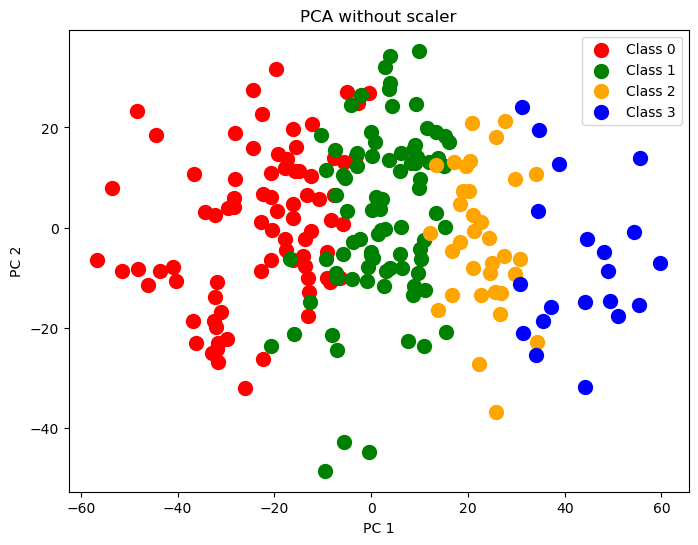

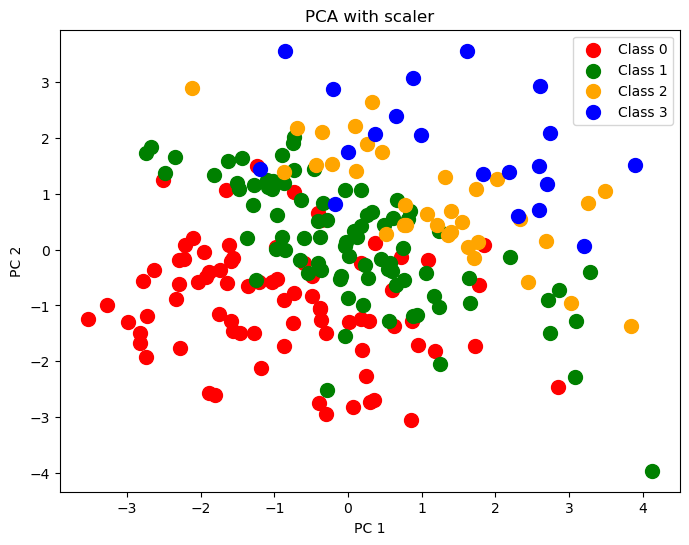

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
# Chuyển đổi nhãn thành số nguyên
y_encoded = le.fit_transform(y)
# Chọn các đặc trưng quan trọng
selector = SelectFromModel(model, threshold=0, prefit=True)
X_selected = selector.transform(X)

# without scaler
pca = PCA(n_components=2)
components = pca.fit_transform(X_selected)

# Định nghĩa danh sách màu sắc
color_palette = ['red', 'green', 'orange', 'blue']

# vẽ biểu đồ 2D
plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(y_encoded)):
    mask = y_encoded == label
    plt.scatter(components[mask, 0], components[mask, 1], s=100, c=color_palette[i], label=f'Class {label}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA without scaler')
plt.legend()
plt.show()

# with scaler
pca = PCA(n_components=2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
components = pipe.fit_transform(X_selected)

# vẽ biểu đồ 2D
plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(y_encoded)):
    mask = y_encoded == label
    plt.scatter(components[mask, 0], components[mask, 1], s=100, c=color_palette[i], label=f'Class {label}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with scaler')
plt.legend()
plt.show()

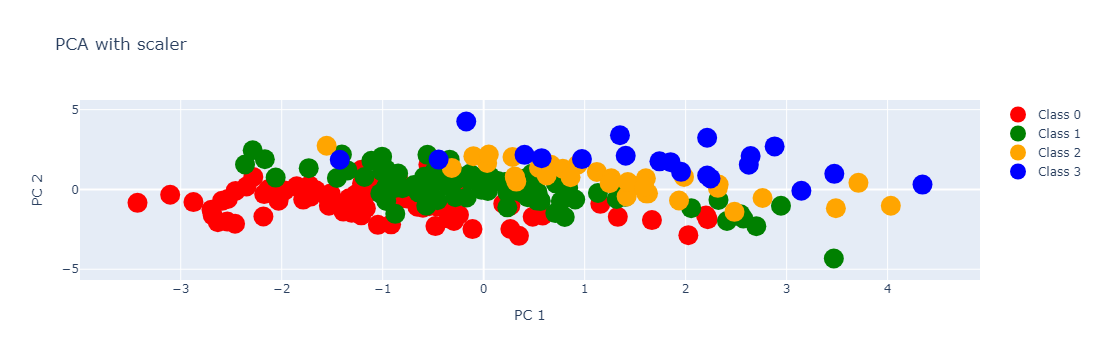

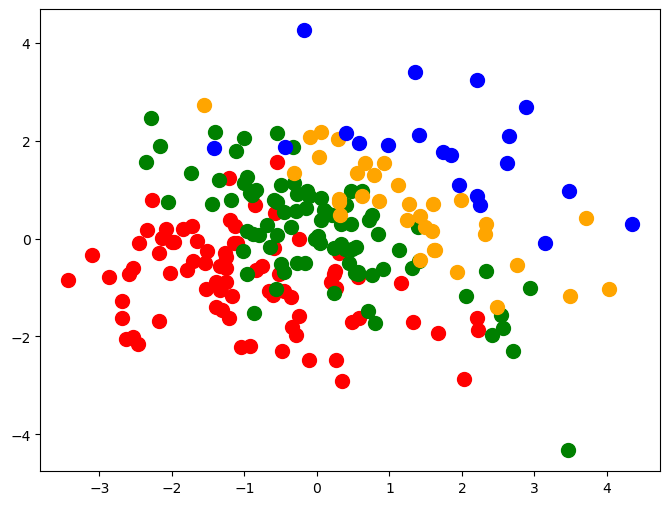

In [13]:
import plotly.graph_objects as go
# Chuyển đổi nhãn thành số nguyên
y_encoded = le.fit_transform(y)
# Sử dụng kết quả PCA từ đoạn code trước
# PCA with scaler
plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(y_encoded)):
    mask = y_encoded == label
    plt.scatter(components[mask, 0], components[mask, 1], s=100, c=color_palette[i], label=f'Class {label}')

# Chuyển đổi sang Plotly
traces = []
for i, label in enumerate(np.unique(y_encoded)):
    mask = y_encoded == label
    trace = go.Scatter(
        x=components[mask, 0],
        y=components[mask, 1],
        mode='markers',
        marker=dict(
            size=20,
            color=color_palette[i]
        ),
        name=f'Class {label}'
    )
    traces.append(trace)

layout = go.Layout(
    title='PCA with scaler',
    xaxis_title='PC 1',
    yaxis_title='PC 2'
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

In [20]:

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

# Mã hóa nhãn Hypertension
le = LabelEncoder()
y_encoded = le.fit_transform(data['Hypertension'])

# Tạo mảng kích thước điểm
#point_sizes = np.full(len(components), 50)
# Tạo danh sách màu sắc tương phản
color_scale = ['red', 'green', 'orange', 'blue']

# Chọn các đặc trưng quan trọng
selector = SelectFromModel(model, threshold=0, prefit=True)
X_selected = selector.transform(X)

# without scaler
pca = PCA(n_components=2)
components = pca.fit_transform(X_selected)
fig = px.scatter(components, x=0, y=1, color=y_encoded, color_continuous_scale=color_scale, labels={'0': 'PC 1', '1': 'PC 2'})
fig.show()

# with scaler
pca = PCA(n_components=2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
components = pipe.fit_transform(X_selected)
fig = px.scatter(components, x=0, y=1, color=y_encoded, color_continuous_scale=color_scale, labels={'0': 'PC 1', '1': 'PC 2'})
fig.show()

C:\Users\MinhThw\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



C:\Users\MinhThw\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


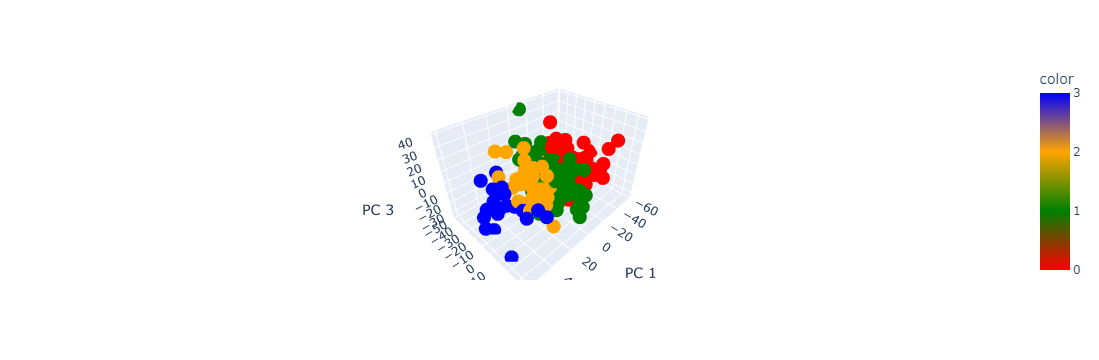

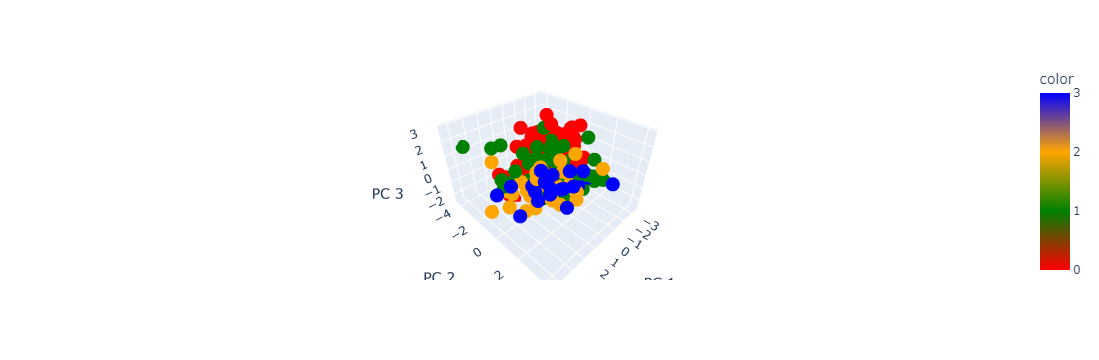

In [11]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


# Mã hóa nhãn Hypertension
le = LabelEncoder()
y_encoded = le.fit_transform(data['Hypertension'])

# Tạo mảng kích thước điểm
point_sizes = np.full(len(components), 219)

# Tạo danh sách màu sắc tương phản
color_scale = ['red', 'green', 'orange', 'blue']

# Chọn các đặc trưng quan trọng
selector = SelectFromModel(model, threshold=0.02, prefit=True)
X_selected = selector.transform(X)

# 3D
pca = PCA()
components = pca.fit_transform(X_selected)
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_encoded, color_continuous_scale=color_scale,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}, 
)
fig.show()

# with scaler
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
components = pipe.fit_transform(X_selected)
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_encoded, color_continuous_scale=color_scale,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()